# <span style="color:blue"> Esercitazione 10 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1 
(code TSP_SA.cpp)


### Scopo dell'esercizio

Lo scopo dell'esercizio è quello di risolvere lo stesso problema del **commesso viaggiatore** (**TSP**) dell'esercitazione 09, ma utilizzando la tecnica del *Simulated Annealing*.

### Descrizione del codice

La struttura del programma è una lieve modifica di quella dell'esercitazione 09.<p>
Stavolta, infatti, si immagina di simulare il sistema a una temperatura fittizia $T$ e la funzione *Move* non ha più il compito di gestire l'evoluzione della specie, bensì si limita a svolgere un algoritmo alla Metropolis: 
- si calcola la cost function della configurazione attuale, 
- vengono proposte mosse di modifica del percorso, generate mediante un operatore di *Mutazione* scelto a caso, 
- si calcola la cost function della nuova configurazione e la si accetta con probabilità $p= \min[1, \exp(-\beta \cdot (L_{new}-L_{old}))]$. <p>

L'operazione viene ripetuta per un certo numero di volte $N_{step}=1000$, dopo di che la temperatura viene abbassata secondo la relazione $T = T_i- \frac{T_i-T_f}{T_{st}} \cdot i_{temp}$ ($i_{temp}=0,1,...,T_{st}$) e la procedura si ripete. Quando il sistema raggiunge temperature prossime allo 0, ci si aspetta che si sia raggiunta la configurazione a minimo costo. I valori utilizzati per l'algoritmo sono stati $T_i=1$, $T_f=0.005$ e un numero di step in temperatura pari a $T_{st}=150$.<p>
Per garantire una buona esplorazione di tutto lo spazio delle configurazioni si è mantenuta una popolazione di $N_{cromo}=2000$ individui. Questa volta non si tratta di una questione di tipo "biologico", ma la scelta di avere 2000 percorsi permette di svolgere in parallelo diversi cammini stocastici nello spazio dei possibili percorsi, in modo da facilitare la ricerca del minimo. <p>
A questo stesso scopo, al termine di ogni applicazione della funzione *Move*, si sostituisce il peggior $10\%$ popolazione, sostituendola con una copia del miglior $10 \%$ della stessa. Questo dovrebbe focalizzare la ricerca nelle regioni dello spazio delle configurazioni a minima energia, agevolando la scoperta del minimo. 


### Analisi dati

Si riportano i grafici del miglior percorso e l'andamento della cost function $L$ per il miglior percorso individuato ad ogni singolo step.

### <span style="color:red"> Caso 1 : città su una circonferenza

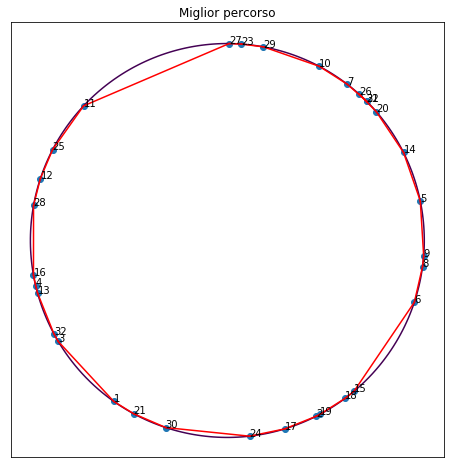

In [6]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

Citta=genfromtxt('SA_C_Citta.dat')
Percorso=genfromtxt('SA_C_BestPath.dat')

N=arange(1,33,1)
plt.figure(figsize=(8.,8.))
plt.title('Miglior percorso')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.1,1.1)
plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Percorso[i])
    stop=int(Percorso[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='r')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='r' )

#---PLOT DEL CERCHIO---#
x = linspace(-1.0, 1.0, 100)
y = linspace(-1.0, 1.0, 100)
X, Y = meshgrid(x,y)
F = X**2 + Y**2 - 1.0
plt.contour(X,Y,F,[0])
plt.show()

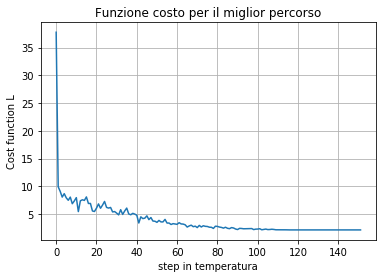

In [11]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

BestL= genfromtxt('SA_C_Best_L.dat')

plt.figure()
plt.title('Funzione costo per il miglior percorso')
plt.plot(BestL[:,0], BestL[:,1], color='C0')
plt.xlabel('step in temperatura')
plt.ylabel('Cost function L')
plt.grid(True)
plt.show()

L'algoritmo converge a un percorso che non è quello minimo, ma vi è molto vicino. Infatti le città sono percorse nel senso di apparizione (orario o antiorario) eccetto per la sequenza $31\rightarrow26\rightarrow20$, in cui si registra un "avanti e indietro". Il valore della distanza percorsa è $2.15326$ a fronte di un valor minimo pari a $2.13133$.
    
### <span style="color:red"> Caso 2 : città in un quadrato

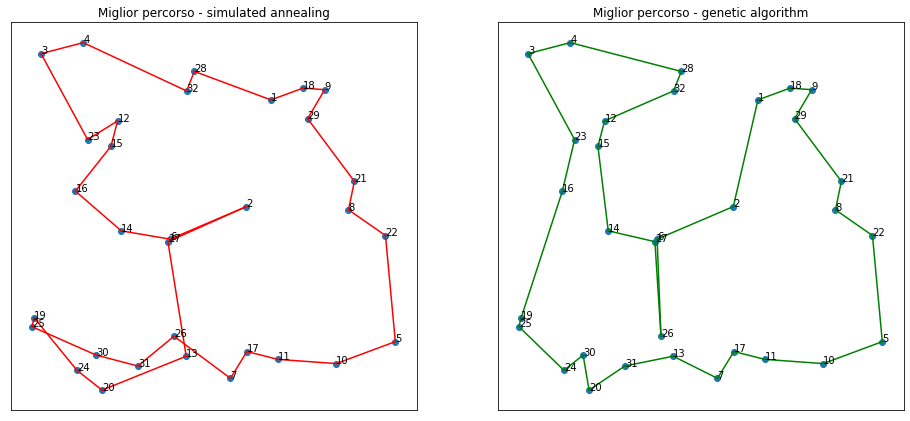

In [5]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

Citta=genfromtxt('SA_Q_Citta.dat')
Percorso=genfromtxt('SA_Q_BestPath.dat')
Old=genfromtxt('Old.dat')  #Bestpath della precedente esercitazione

#-------Percorso ottimale-------#
N=arange(1,33,1)
plt.figure(figsize=(16.,8.))
plt.subplot(1, 2, 1)
plt.title('Miglior percorso - simulated annealing')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Percorso[i])
    stop=int(Percorso[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='r')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='r' )

#-------Percorso vecchio-------#
plt.subplot(1, 2, 2)
plt.title('Miglior percorso - genetic algorithm')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Old[i])
    stop=int(Old[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='g')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='g' )
plt.show()

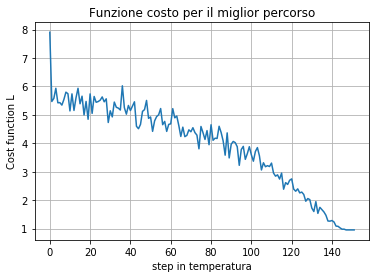

In [6]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

BestL= genfromtxt('SA_Q_Best_L.dat')

plt.figure()
plt.title('Funzione costo per il miglior percorso')
plt.plot(BestL[:,0], BestL[:,1], color='C0')
plt.xlabel('step in temperatura')
plt.ylabel('Cost function L')
plt.grid(True)
plt.show()

Nel caso del quadrato l'algoritmo invidua un percorso migliore rispetto a quanto svolto dall'algoritmo genetico. La distanza del commesso risulta, infatti, pari a $0.952549$, contro i $1.04648$ trovati nell'esercitazione 09. <p>
I due percorsi sono significativamente diversi tra loro, ma nessuno dei due si può considerare come minimo globale. Si intuisce infatti che si potrebbero invertire le città $19$ e $25$, ottenendo un cammino più breve.

## <span style="color:blue"> Esercizio 2 
(code TSP_parallel.cpp)


### Scopo dell'esercizio

Lo scopo dell'esercizio è quello di parallelizzare il codice dell'esercitazione 09 allo scopo di risolvere il problema delle città disposte in un quadrato, includendo la possibilità di migrazione da un continente (nodo) all'altro. Il numero di CPU da utilizzare è 4.

### Descrizione del codice

Il codice è sostanzialmente identico a quello dell'esercitazione 09, con l'inclusione dei comandi di inizializzazione e finalizzazione della libreria MPI. Vi sono, però, due differenze fondamentali.
- La prima riguarda la funzione *Input*, che stavolta non genera a caso la mappa delle 32 città, bensì legge da file la configurazione generata nell'esercitazione precedente. Questo è ovvio, visto che l'obiettivo è ottimizzare la risoluzione di quello specifico problema.<p>
    
- La seconda è la possibilità di **migrazione**. Ogni $N_{migr}$ generazioni vengono scelti a caso due *Continenti* (ovvero due nodi) distinti e si fa in modo che questi si scambino il loro miglior individuo, sostituendolo a quello peggiore. Questi due candidati sono scelti mediante lo stesso meccanismo di roulette truccata utilizzata per la *Selezione*.
Per ragioni tecniche, visto che nel paradigma SPMD tutti i 4 nodi eseguono lo stesso programma, è soltanto il nodo 0 che avvia la fase di migrazione scegliendo i due continenti interessanti e, una volta fatto ciò, lo comunica a tutti gli altri (*MPI_Bcast()*). <p>
    
I parametri sono gli stessi dell'esercitazione precedente, salvo un numero di generazioni ridotto a $N_{gen}=300$, a seguito delle considerazioni svolte nell'analisi dati dell'esercitazione 09. Si è scelto, inoltre, $N_{migr}=80$.

### Analisi dati

Si riportano i grafici del miglior percorso e l'andamento della cost function $L$ sia per il miglior percorso, sia il vuo valor medio sulla migliore metà della popolazione (identicamente all'esercitazione 09).

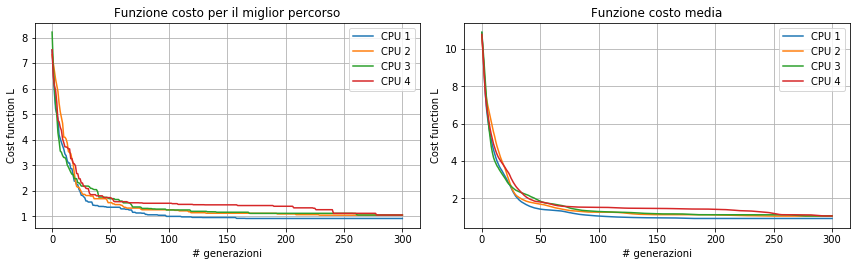

In [3]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

BestL0= genfromtxt('Best_L0.dat')
BestL1= genfromtxt('Best_L1.dat')
BestL2= genfromtxt('Best_L2.dat')
BestL3= genfromtxt('Best_L3.dat')

AveL0= genfromtxt('Ave_L0.dat')
AveL1= genfromtxt('Ave_L1.dat')
AveL2= genfromtxt('Ave_L2.dat')
AveL3= genfromtxt('Ave_L3.dat')

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.set_title('Funzione costo per il miglior percorso')
ax.plot(BestL0[:,0], BestL0[:,1], color='C0', label='CPU 1')
ax.plot(BestL1[:,0], BestL1[:,1], color='C1', label='CPU 2')
ax.plot(BestL2[:,0], BestL2[:,1], color='C2', label='CPU 3')
ax.plot(BestL3[:,0], BestL3[:,1], color='C3', label='CPU 4')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.legend()
ax.grid(True)

ax = fig.add_subplot(122)
ax.set_title('Funzione costo media')
ax.plot(AveL0[:,0], AveL0[:,1], color='C0', label='CPU 1')
ax.plot(AveL1[:,0], AveL1[:,1], color='C1', label='CPU 2')
ax.plot(AveL2[:,0], AveL2[:,1], color='C2', label='CPU 3')
ax.plot(AveL3[:,0], AveL3[:,1], color='C3', label='CPU 4')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

Tutte le 4 CPU performano una buona ricerca, ma quella che raggiunge il risultato minimo è la CPU 1. Pertanto si è scelto il suo come miglior percorso.

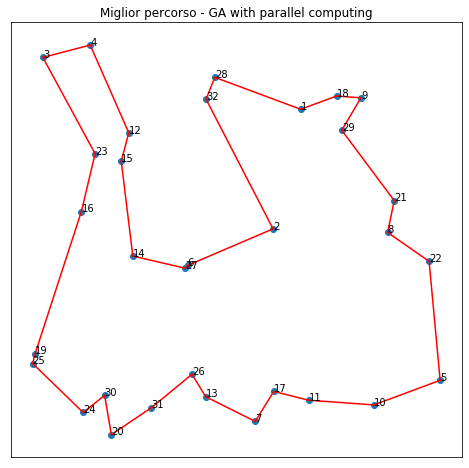

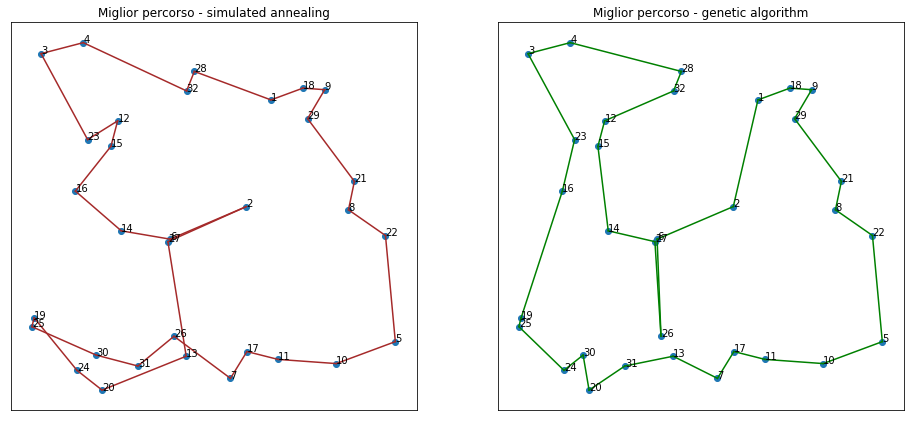

In [9]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

Citta=genfromtxt('SA_Q_Citta.dat')
PercorsoSA=genfromtxt('SA_Q_BestPath.dat') #Bestpath SA
Percorso=genfromtxt('BestPath0.dat') #Bestpath parallel GA
Old=genfromtxt('Old.dat')  #Bestpath della precedente esercitazione

#-------Percorso ottimale PGA-------#
N=arange(1,33,1)
plt.figure(figsize=(16.,8.))
plt.title('Miglior percorso - GA with parallel computing')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Percorso[i])
    stop=int(Percorso[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='r')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='r' )
plt.show()

#-------Percorso ottimale SA-------#
N=arange(1,33,1)
plt.figure(figsize=(16.,8.))
plt.subplot(1, 2, 1)
plt.title('Miglior percorso - simulated annealing')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(PercorsoSA[i])
    stop=int(PercorsoSA[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='brown')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='brown' )

#-------Percorso vecchio-------#
plt.subplot(1, 2, 2)
plt.title('Miglior percorso - genetic algorithm')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Old[i])
    stop=int(Old[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='g')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='g' )
plt.show()

Visivamente è chiaro che la parallelizzazione dell'algoritmo ha giovato molto nella ricerca del minimo. Si era già osservato nel precedente notebook che il sistema non avesse raggiunto il minimo globale. Questa volta, invece, sembra che la ricerca sia andata a buon fine o perlomeno che ci si sia avvicinati molto al minimo globale. La configurazione trovata dalla CPU 1 è, infatti, a distanza minore rispetto a quella trovata in precedenza  sia con il simulated annealing sia con l'algoritmo genetico. Nel primo caso essa è $0.91571$, nel secondo caso $0.952549$, nel terzo caso $1.04648$. <p> 